In [50]:
## python3 -m pip install "pdfplumber"
import pdfplumber
pdf = pdfplumber.open("June 2021 AP-NORC PUF codebook.pdf")
questions = []

for i in range(4,11):

    
    page = pdf.pages[i]
    extracted = page.extract_table()

    def extract_values_with_char(list_of_lists, char):
        result = []
        for sublist in list_of_lists:
            for item in sublist:
                if isinstance(item, str) and char in item:
                    result.append(item)
        return result

    data = extracted
    char_to_find = ":"

    result = extract_values_with_char(data, char_to_find)

    questions.append(result)

print(questions)

[['SU_ID: CaseID', 'FINALWT: Post-stratification', 'SURV_MODE: Survey interview\nmode (online or phone)', 'SURV_LANG: Survey Interview', 'CUR1: Generally speaking, would\nyou say things in this country are\nheading in the…', 'CUR3AB: Overall, do you', 'CURY2A: [The economy] Overall,\ndo you approve or disapprove of\nthe way Joe Biden is handling…?', 'CURY2B: [The coronavirus', 'CURY2C: [Health care] Overall,\ndo you approve or disapprove of\nthe way Joe Biden is handling…?', 'CURY2D: [Immigration] Overall,', 'CURY2E: [Foreign policy]\nOverall, do you approve or\ndisapprove of the way Joe Biden\nis handling…?', 'CURY2F: [The U.S. relationship', 'CURY2G: [The conflict between\nthe Israelis and Palestinians]\nOverall, do you approve or\ndisapprove of the way Joe Biden\nis handling…?'], ['B1AB: How would you describe', 'GOVTA: [Families with children]\nIs the U.S. government spending\ntoo much, too little, or about the\nright amount to support…', 'GOVTB: [Medical care for women', 'GOVTC: [

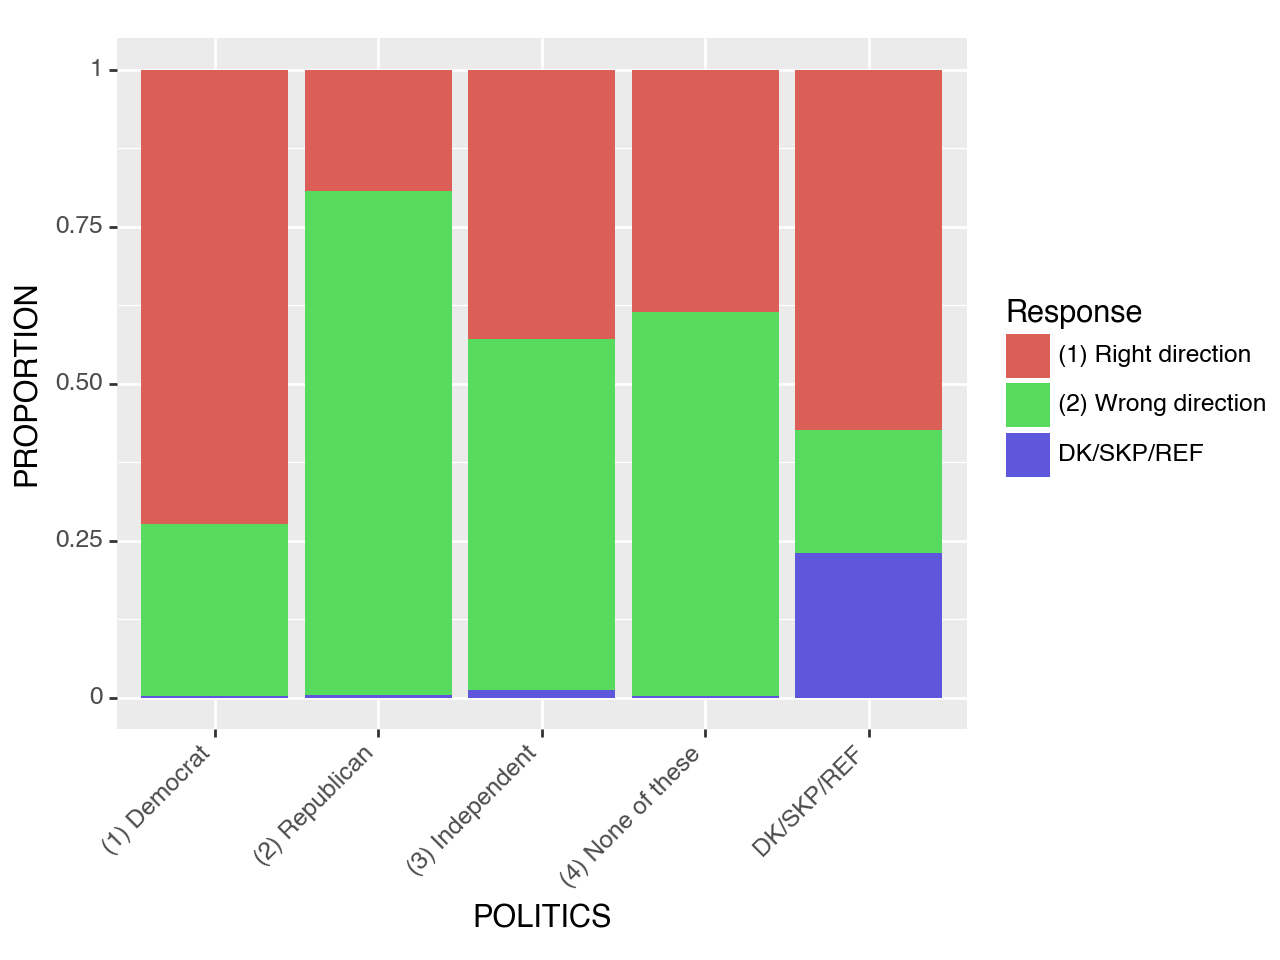

<Figure Size: (640 x 480)>

In [67]:
import pandas as pd
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar, labs, theme, element_text

data = pd.read_csv('APNORC_june2021_PUF.csv')
question = "CUR1"
variable = "POLITICS"

data[variable] = data[variable].where(data[variable] != data[variable].str.upper(), "DK/SKP/REF")
data[question] = data[question].where(data[question] != data[question].str.upper(), "DK/SKP/REF")

# data.head()

(
    ggplot(data) + 
           aes(x = variable, y = "FINALWT", fill = question) +
           geom_bar(stat = "identity", position = "fill") +
           labs(x = variable, y = "PROPORTION", fill = "Response") +
           theme(axis_text_x=element_text(angle=45, hjust=1))

)


